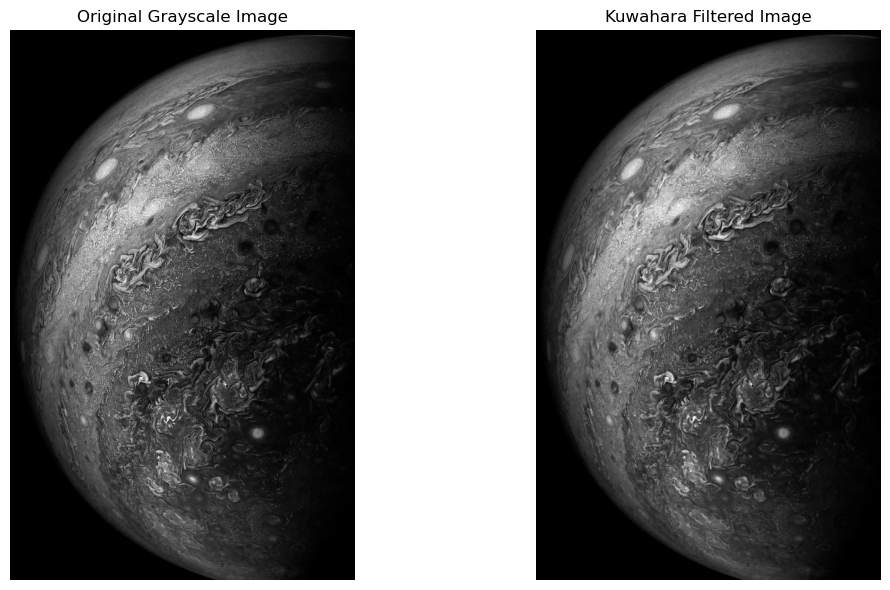

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import uniform_filter

# Load the image and convert it to grayscale
image_path = "C:\\Users\\ASUS\\Downloads\\img1.jpeg" # Replace this with your image path
img = Image.open(image_path).convert('L')
img_np = np.array(img, dtype=np.float32)

def kuwahara_filter(image, window_size=5):
    # Define the radius of the window
    radius = window_size // 2

    # Pad the image to handle edges
    padded_image = np.pad(image, ((radius, radius), (radius, radius)), mode='reflect')
    
    # Define regions based on padding, size
    region1 = uniform_filter(padded_image, size=(radius+1, radius+1))[radius:-radius, radius:-radius]
    region2 = uniform_filter(padded_image, size=(radius+1, radius))[radius:-radius, (radius+1):-(radius-1)]
    region3 = uniform_filter(padded_image, size=(radius, radius+1))[(radius+1):-(radius-1), radius:-radius]
    region4 = uniform_filter(padded_image, size=(radius, radius))[(radius+1):-(radius-1), (radius+1):-(radius-1)]

    # Calculate mean square values for variance estimation
    mean_sq1 = uniform_filter(padded_image**2, size=(radius+1, radius+1))[radius:-radius, radius:-radius]
    mean_sq2 = uniform_filter(padded_image**2, size=(radius+1, radius))[radius:-radius, (radius+1):-(radius-1)]
    mean_sq3 = uniform_filter(padded_image**2, size=(radius, radius+1))[(radius+1):-(radius-1), radius:-radius]
    mean_sq4 = uniform_filter(padded_image**2, size=(radius, radius))[(radius+1):-(radius-1), (radius+1):-(radius-1)]

    # Calculate variance for each region
    var1 = mean_sq1 - region1**2
    var2 = mean_sq2 - region2**2
    var3 = mean_sq3 - region3**2
    var4 = mean_sq4 - region4**2

    # Stack all the means and variances to find minimum variance region
    means = np.stack([region1, region2, region3, region4], axis=0)
    variances = np.stack([var1, var2, var3, var4], axis=0)

    # Select the mean from the region with the lowest variance
    min_variance_index = np.argmin(variances, axis=0)
    result = np.choose(min_variance_index, means)

    return result

# Apply the Kuwahara filter to the image
kuwahara_result = kuwahara_filter(img_np, window_size=5)

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_np, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Kuwahara Filtered Image')
plt.imshow(kuwahara_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()